# TechLab Data-Science-Kurs in Münster seit April-2024 #


was ich noch lesen möchte: https://stackoverflow.com/questions/41325227/how-to-do-linear-regression-using-python-and-scikit-learn-using-one-hot-encoding 

was ich noch lesen möchte: https://www.kaggle.com/code/subhadeeptasahoo/multiple-linear-regression-with-onehotencoding/notebook

was ich noch lesen möchte: https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/

### Importing the dataset and libraries


we have the data from: https://www.kaggle.com/datasets/dumanmesut/individual-carbon-footprint-calculation/data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('Carbon_Emission.csv',sep=";")
df

,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,Vehicle Monthly Distance Km,Waste Bag Size,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,Energy efficiency,Recycling,Cooking_With,CarbonEmission
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,210,large,4,7,26,1,No,['Metal'],"['Stove', 'Oven']",2238
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,9,extra large,3,9,38,5,No,['Metal'],"['Stove', 'Microwave']",1892
2,overweight,male,omnivore,more frequently,wood,private,petrol,never,138,never,2472,small,1,14,47,6,Sometimes,['Metal'],"['Oven', 'Microwave']",2595
3,overweight,male,omnivore,twice a day,wood,walk/bicycle,NaN,sometimes,157,rarely,74,medium,3,20,5,7,Sometimes,"['Paper', 'Plastic', 'Glass', 'Metal']","['Microwave', 'Grill', 'Airfryer']",1074
4,obese,female,vegetarian,daily,coal,private,diesel,often,266,very frequently,8457,large,1,3,5,6,Yes,['Paper'],['Oven'],4743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,obese,male,omnivore,twice a day,coal,private,hybrid,sometimes,230,never,268,medium,5,12,27,9,Yes,[],['Microwave'],2408
9996,normal,female,vegan,twice a day,coal,private,lpg,never,234,frequently,5316,extra large,3,14,8,24,Sometimes,"['Paper', 'Plastic']","['Stove', 'Microwave']",3084
9997,overweight,female,vegetarian,daily,electricity,walk/bicycle,NaN,sometimes,298,very frequently,96,extra large,5,11,5,24,Yes,"['Paper', 'Plastic', 'Metal']","['Microwave', 'Grill', 'Airfryer']",2377
9998,underweight,male,vegan,more frequently,coal,private,petrol,often,179,rarely,8688,medium,5,19,14,5,Sometimes,"['Paper', 'Metal']","['Stove', 'Microwave', 'Grill', 'Airfryer']",4574


### sorting the variable into groups 

In [3]:


#variables_quantitative =df.select_dtypes(include=[np.number]).drop('CarbonEmission',axis=1).columns.tolist()
variables_quantitative = [
    "Monthly Grocery Bill", "Vehicle Monthly Distance Km", 
    "Waste Bag Weekly Count", "How Long TV PC Daily Hour",
    "How Many New Clothes Monthly", "How Long Internet Daily Hour"]             #"CarbonEmission" wäre auch noch eine Zahlenmenge

variables_mit_mehreren_antwortmoeglichkeiten=["Recycling" ,"Cooking_With"]       #Variable mit mehrere Antwortmöglichkeiten

variables_for_one_hot_encoded=['Body Type','Sex','Diet','How Often Shower',
                               'Heating Energy Source','Social Activity',
                               'Frequency of Traveling by Air','Waste Bag Size','Energy efficiency']

variables_transport_vehicle_type=["Transport","Vehicle Type"]                    #Werte aus 2 Spalten in 1 Spalte zusammengeführt

#gibt noch die Spalte "CarbonEmission"


all_columns=set(variables_mit_mehreren_antwortmoeglichkeiten).union(
    variables_transport_vehicle_type,
    variables_quantitative,
    variables_for_one_hot_encoded,
    ["CarbonEmission"])
assert set(df.columns.tolist()).difference(all_columns)==set() #überprüft ob empty-set ist dh ob ich in den obrigen Listen alle Spalten erwähnt habe

In [4]:
df.dtypes

Body Type                        object
Sex                              object
Diet                             object
How Often Shower                 object
Heating Energy Source            object
Transport                        object
Vehicle Type                     object
Social Activity                  object
Monthly Grocery Bill              int64
Frequency of Traveling by Air    object
Vehicle Monthly Distance Km       int64
Waste Bag Size                   object
Waste Bag Weekly Count            int64
How Long TV PC Daily Hour         int64
How Many New Clothes Monthly      int64
How Long Internet Daily Hour      int64
Energy efficiency                object
Recycling                        object
Cooking_With                     object
CarbonEmission                    int64
dtype: object

### Information about the variables

In [5]:
print(df.shape[0], "- how many people are there")
print(df[df['How Long Internet Daily Hour'] > 20].shape[0], "- how many people spend more then 20 hours daily internet surfing")
print(df[df['How Long TV PC Daily Hour'] > 20].shape[0], "- how many people spend more then 20 hours daily watching TV")

10000 - how many people are there
1592 - how many people spend more then 20 hours daily internet surfing
1557 - how many people spend more then 20 hours daily watching TV


In [6]:
df.isna().sum()

Body Type                           0
Sex                                 0
Diet                                0
How Often Shower                    0
Heating Energy Source               0
Transport                           0
Vehicle Type                     6721
Social Activity                     0
Monthly Grocery Bill                0
Frequency of Traveling by Air       0
Vehicle Monthly Distance Km         0
Waste Bag Size                      0
Waste Bag Weekly Count              0
How Long TV PC Daily Hour           0
How Many New Clothes Monthly        0
How Long Internet Daily Hour        0
Energy efficiency                   0
Recycling                           0
Cooking_With                        0
CarbonEmission                      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Body Type                      10000 non-null  object
 1   Sex                            10000 non-null  object
 2   Diet                           10000 non-null  object
 3   How Often Shower               10000 non-null  object
 4   Heating Energy Source          10000 non-null  object
 5   Transport                      10000 non-null  object
 6   Vehicle Type                   3279 non-null   object
 7   Social Activity                10000 non-null  object
 8   Monthly Grocery Bill           10000 non-null  int64 
 9   Frequency of Traveling by Air  10000 non-null  object
 10  Vehicle Monthly Distance Km    10000 non-null  int64 
 11  Waste Bag Size                 10000 non-null  object
 12  Waste Bag Weekly Count         10000 non-null  int64 
 13  Ho

In [8]:
df.nunique()


Body Type                           4
Sex                                 2
Diet                                4
How Often Shower                    4
Heating Energy Source               4
Transport                           3
Vehicle Type                        5
Social Activity                     3
Monthly Grocery Bill              250
Frequency of Traveling by Air       4
Vehicle Monthly Distance Km      4003
Waste Bag Size                      4
Waste Bag Weekly Count              7
How Long TV PC Daily Hour          25
How Many New Clothes Monthly       51
How Long Internet Daily Hour       25
Energy efficiency                   3
Recycling                          16
Cooking_With                       16
CarbonEmission                   3509
dtype: int64

In [9]:
#values of the variables

for number, headline in enumerate(df.columns.tolist()):
    values=df[headline].unique()    #=angenommenen Werte 
    if headline in variables_mit_mehreren_antwortmoeglichkeiten:     #mehrere Antwortmöglichkeiten
        unique_values= set([item for sublist in df[headline].unique() for item in eval(sublist)]) #eval - Convert string representation of list to an actual list
        print("Nr." + str(number+1), "- length:", len(unique_values),"-", headline,"-",unique_values)
        continue
    elif headline in variables_quantitative or headline=="CarbonEmission":     #quantitative variables
        if sorted(list(values))==list(range(values.min(),values.max()+1)): #sind die angenommenen Werte gleich range(min,max)?
            print("Nr." + str(number+1), "- length:", len(values),"-", headline,"-", range(values.min(),values.max()+1))
        else:
            print("Nr." + str(number+1), "- length:", len(values),"-", headline,"- from",values.min(),"till", values.max())
        continue
    elif headline=="Vehicle Type":    #Wert "nan" kann nicht sortiert werden
        print("Nr." + str(number+1), "- length:", len(values),"-", headline,"-",values)
        continue
    else:
        print("Nr." + str(number+1), "- length:", len(values),"-", headline,"-",sorted(values))


Nr.1 - length: 4 - Body Type - ['normal', 'obese', 'overweight', 'underweight']
Nr.2 - length: 2 - Sex - ['female', 'male']
Nr.3 - length: 4 - Diet - ['omnivore', 'pescatarian', 'vegan', 'vegetarian']
Nr.4 - length: 4 - How Often Shower - ['daily', 'less frequently', 'more frequently', 'twice a day']
Nr.5 - length: 4 - Heating Energy Source - ['coal', 'electricity', 'natural gas', 'wood']
Nr.6 - length: 3 - Transport - ['private', 'public', 'walk/bicycle']
Nr.7 - length: 6 - Vehicle Type - [nan 'petrol' 'diesel' 'hybrid' 'lpg' 'electric']
Nr.8 - length: 3 - Social Activity - ['never', 'often', 'sometimes']
Nr.9 - length: 250 - Monthly Grocery Bill - range(50, 300)
Nr.10 - length: 4 - Frequency of Traveling by Air - ['frequently', 'never', 'rarely', 'very frequently']
Nr.11 - length: 4003 - Vehicle Monthly Distance Km - from 0 till 9999
Nr.12 - length: 4 - Waste Bag Size - ['extra large', 'large', 'medium', 'small']
Nr.13 - length: 7 - Waste Bag Weekly Count - range(1, 8)
Nr.14 - length

### variables "Transport" and "Vehicle Type" (they have combined information)


In [10]:

##test
#test: if "Transport"=="public transport" then "Vehicle Type"==NaN
assert df[df["Transport"]=="public"]["Vehicle Type"].isna().all()  #wenn in der Liste alle True sind, kommt ein True raus dh stellt sicher das alle true sind #assert tut gar nichts bei True aber bei False macht Fehlermeldung und hört auf

#test: if "walk/bicycle" then "Vehicle Type"==NaN
assert df[df["Transport"]=="walk/bicycle"]["Vehicle Type"].isna().all()  #wenn in der Liste alle True sind, kommt ein True raus dh stellt sicher das alle true sind #assert tut gar nichts bei True aber bei False macht Fehlermeldung und hört auf

#test: if "Transport"=="private" then "Vehicle Type"!=NaN
assert not ((df["Transport"]=="private") & (df["Vehicle Type"].isna())).any() #any weil gibt es irgendein True? False heißt es gibt kein einziges True



In [11]:

##create new column: 
df["Transport Vehicle Type"]=df["Vehicle Type"] #definiere neue Spalte
df.loc[df["Transport Vehicle Type"].isna(), "Transport Vehicle Type"] = df["Transport"] # Werte aus 'Transport' übernehmen, wenn 'Vehicle Type' NaN ist


##add "Transport Vehicle Type" to one-hot-encoding-list
if "Transport Vehicle Type" not in variables_for_one_hot_encoded: ##wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
    variables_for_one_hot_encoded.append("Transport Vehicle Type") 

##veranschaulichen der neuen Spalten und ihrer Werte
print(len(df["Transport Vehicle Type"].unique()),"values in Transport Vehicle Type:", df["Transport Vehicle Type"].unique(),"- gestrichen wurden: nan und 'private'")
print(len(df["Transport"].unique()),"values in Transport:", df["Transport"].unique())
print(len(df["Vehicle Type"].unique()),"values in Vehicle Type:", df["Vehicle Type"].unique())
df[["Transport","Vehicle Type","Transport Vehicle Type"]]


7 values in Transport Vehicle Type: ['public' 'walk/bicycle' 'petrol' 'diesel' 'hybrid' 'lpg' 'electric'] - gestrichen wurden: nan und 'private'
3 values in Transport: ['public' 'walk/bicycle' 'private']
6 values in Vehicle Type: [nan 'petrol' 'diesel' 'hybrid' 'lpg' 'electric']


,Transport,Vehicle Type,Transport Vehicle Type
0,public,NaN,public
1,walk/bicycle,NaN,walk/bicycle
2,private,petrol,petrol
3,walk/bicycle,NaN,walk/bicycle
4,private,diesel,diesel
...,...,...,...
9995,private,hybrid,hybrid
9996,private,lpg,lpg
9997,walk/bicycle,NaN,walk/bicycle
9998,private,petrol,petrol


In [12]:
#Zusammenfassung welche Werte die mehreren Spalten ist

#ich GLAUBE das problem ist: Python lässt die mit "NaN" unter dem Tisch fallen
print(df.groupby(["Transport","Vehicle Type","Transport Vehicle Type"]).size())
print(df.groupby(["Transport","Transport Vehicle Type"]).size())
#print(df.groupby(["Vehicle Type","Transport Vehicle Type"]).size())
#print(df.groupby(["Transport","Vehicle Type"]).size())


Transport  Vehicle Type  Transport Vehicle Type
private    diesel        diesel                    622
           electric      electric                  671
           hybrid        hybrid                    642
           lpg           lpg                       697
           petrol        petrol                    647
dtype: int64
Transport     Transport Vehicle Type
private       diesel                     622
              electric                   671
              hybrid                     642
              lpg                        697
              petrol                     647
public        public                    3294
walk/bicycle  walk/bicycle              3427
dtype: int64


### variables "Recycling" and "Cooking_With" (these variables allow multiple answers)

In [13]:

##create new column: dummy-variables for Recycling
unique_values_Recycling= set([item for sublist in df['Recycling'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Recycling-Möglichkeiten
# Für jede einzigartige Recycling-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
for item in unique_values_Recycling:
    df['Recycling '+str(item)] = df['Recycling'].apply(lambda x: 1 if item in x else 0)

##create new column: dummy-variables for Cooking-with
unique_values_cooking_With= set([item for sublist in df['Cooking_With'].unique() for item in eval(sublist)]) # Liste aller einzigartigen Cooking_With-Möglichkeiten
# Für jede einzigartige Cooking_With-Möglichkeit eine neue Spalte hinzufügen und mit 0 oder 1 füllen
for item in unique_values_cooking_With:
    df['Cooking With '+str(item)] = df['Cooking_With'].apply(lambda x: 1 if item in x else 0)



##add new columns to "variables_quantitative"-list for lineare Regression
columns_recycling=['Recycling '+str(item) for item in unique_values_Recycling] #liste mit Spalten-Namen
if columns_recycling[0] not in variables_quantitative: ##wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
    variables_quantitative += columns_recycling
columns_cooking_with=['Cooking With '+str(item) for item in unique_values_cooking_With] #liste mit Spalten-Namen
if columns_cooking_with[0] not in variables_quantitative: ##wenn es noch nicht hinzugefügt wurde bzw is one element in the list already?
    variables_quantitative += columns_cooking_with

#Person 282 cooks with "nothing" deshalb can bei one-hot-encoding nicht eine Spalte gelöscht werden, person 283 who doesn't recycle deshalb can bei one-hot-encoding nicht eine Spalte gelöscht werden
#Darstellung 
df.iloc[:, -13:] #prints the last 13 columns
df.iloc[282:284, -13:] 

,Recycling,Cooking_With,CarbonEmission,Transport Vehicle Type,Recycling Plastic,Recycling Glass,Recycling Metal,Recycling Paper,Cooking With Oven,Cooking With Microwave,Cooking With Airfryer,Cooking With Stove,Cooking With Grill
282,"['Paper', 'Plastic', 'Metal']",[],1484,public,1,0,1,1,0,0,0,0,0
283,[],"['Stove', 'Grill', 'Airfryer']",2955,public,0,0,0,0,0,0,1,1,1


### Probleme bei Airfryer and Grill

Cooking With Airfryer  Cooking With Grill
0                      0                     5008
1                      1                     4992
dtype: int64


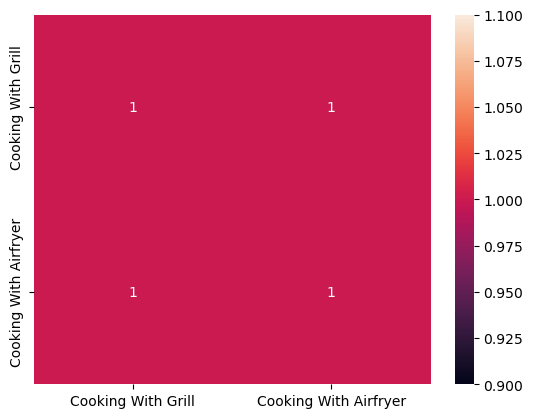

,Cooking_With,Cooking With Grill,Cooking With Airfryer
3,"['Microwave', 'Grill', 'Airfryer']",1,1
6,"['Grill', 'Airfryer']",1,1
8,"['Microwave', 'Grill', 'Airfryer']",1,1
9,"['Microwave', 'Grill', 'Airfryer']",1,1
13,"['Stove', 'Oven', 'Microwave', 'Grill', 'Airfr...",1,1
...,...,...,...
9989,"['Stove', 'Oven', 'Microwave', 'Grill', 'Airfr...",1,1
9992,"['Stove', 'Grill', 'Airfryer']",1,1
9997,"['Microwave', 'Grill', 'Airfryer']",1,1
9998,"['Stove', 'Microwave', 'Grill', 'Airfryer']",1,1


In [14]:
##create dummy-variables for "Cooking With": 
df['Cooking With Grill'] = df['Cooking_With'].apply(lambda x: 1 if "Grill" in x else 0)
df['Cooking With Airfryer'] = df['Cooking_With'].apply(lambda x: 1 if "Airfryer" in x else 0)


#what are the values for the variables "Cooking With Airfryer","Cooking With Grill"
print(df.groupby(["Cooking With Airfryer","Cooking With Grill"]).size())

import matplotlib.pyplot as plt
correlations = df[["Cooking With Grill", "Cooking With Airfryer"]].corr()
#plt.figure(figsize=(9, 5))
sns.heatmap(correlations, annot=True)
plt.show()

#all people where "Cooking With" is Grill
df[df["Cooking With Grill"] == 1][["Cooking_With", "Cooking With Grill", "Cooking With Airfryer"]]



### One-Hot-Encoding for categorical variables

In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df[variables_quantitative + variables_for_one_hot_encoded]   #Ziel: every column except "CarbonEmission"

# Create the ColumnTransformer using the list "variables_for_one_hot_encoded"
cf = ColumnTransformer(
    [(col, OneHotEncoder(drop="first"), [col]) for col in variables_for_one_hot_encoded],  
    remainder="passthrough")   


cf.fit(X)
X_transformed = cf.transform(X)


##### checking what the dataset with one-hot-encoding for Person with id 0 looks like

In [16]:
liste3=[1,2,4,13]
liste2=[23, 2,12]
liste2+liste3

[23, 2, 12, 1, 2, 4, 13]

In [17]:
cf

/opt/homebrew/Caskroom/miniforge/base/envs/elisabeth_python-umgebung_nr1/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('Body Type', OneHotEncoder(drop='first'),
                                 ['Body Type']),
                                ('Sex', OneHotEncoder(drop='first'), ['Sex']),
                                ('Diet', OneHotEncoder(drop='first'), ['Diet']),
                                ('How Often Shower',
                                 OneHotEncoder(drop='first'),
                                 ['How Often Shower']),
                                ('Heating Energy Source',
                                 OneHotEncoder(drop='first'),
                                 ['Heating Energy Source']),
                                ('Social...y', OneHotEncoder(drop='first'),
                                 ['Social Activity']),
                                ('Frequency of Traveling by Air',
                                 OneHotEncoder(drop='first'),
                                 ['Frequency of Traveling by Air']),
                                ('Waste Bag Size', OneHotEncoder(drop='first'),
                                 ['Waste Bag Size']),
                                ('Energy efficiency',
                                 OneHotEncoder(drop='first'),
                                 ['Energy efficiency']),
                                ('Transport Vehicle Type',
                                 OneHotEncoder(drop='first'),
                                 ['Transport Vehicle Type'])])

In [18]:
X_transformed[0]

array([  0.,   1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   1.,   0., 230., 210.,   4.,   7.,
        26.,   1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.,   0.])

In [19]:
df.iloc[0]

Body Type                               overweight
Sex                                         female
Diet                                   pescatarian
How Often Shower                             daily
Heating Energy Source                         coal
Transport                                   public
Vehicle Type                                   NaN
Social Activity                              often
Monthly Grocery Bill                           230
Frequency of Traveling by Air           frequently
Vehicle Monthly Distance Km                    210
Waste Bag Size                               large
Waste Bag Weekly Count                           4
How Long TV PC Daily Hour                        7
How Many New Clothes Monthly                    26
How Long Internet Daily Hour                     1
Energy efficiency                               No
Recycling                                ['Metal']
Cooking_With                     ['Stove', 'Oven']
CarbonEmission                 

In [20]:
cf.transformers_[:]

[('Body Type', OneHotEncoder(drop='first'), ['Body Type']),
 ('Sex', OneHotEncoder(drop='first'), ['Sex']),
 ('Diet', OneHotEncoder(drop='first'), ['Diet']),
 ('How Often Shower', OneHotEncoder(drop='first'), ['How Often Shower']),
 ('Heating Energy Source',
  OneHotEncoder(drop='first'),
  ['Heating Energy Source']),
 ('Social Activity', OneHotEncoder(drop='first'), ['Social Activity']),
 ('Frequency of Traveling by Air',
  OneHotEncoder(drop='first'),
  ['Frequency of Traveling by Air']),
 ('Waste Bag Size', OneHotEncoder(drop='first'), ['Waste Bag Size']),
 ('Energy efficiency', OneHotEncoder(drop='first'), ['Energy efficiency']),
 ('Transport Vehicle Type',
  OneHotEncoder(drop='first'),
  ['Transport Vehicle Type']),
 ('remainder',
  FunctionTransformer(accept_sparse=True, check_inverse=False,
                      feature_names_out='one-to-one'),
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])]

### linear Regression


In [21]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

y = df["CarbonEmission"]


scores = []
for i in range(10):
    ##Splitting the dataset into train and test set
    X_train, X_test, y_train, y_test = train_test_split(X_transformed,y, train_size = 0.75)

    ##Implementing the linear model
    model = LinearRegression()
    model.fit(X_train, y_train)

    ##Evaluating the Model
    scores.append(model.score(X_test, y_test))

print("average R-squared score (from test-set):",np.mean(scores))


average R-squared score (from test-set): 0.93407260010068


AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

### Regression Equation 


In [ ]:
# Get the feature names after one-hot encoding. Ella does NOT understand that - chatGTP did the programming
ohe_feature_names = []
for col, transformer, _ in cf.transformers_[:-1]:
    ohe_feature_names.extend(transformer.get_feature_names_out([col]))
all_feature_names = ohe_feature_names + variables_quantitative

In [ ]:
#Regression Equation
regression_equation ="Regression Equation: CarbonEmission = "
for variable, slope in list(zip(all_feature_names, model.coef_)):
   regression_equation += "(" + str(round(slope,3)) + "*" + variable + ") + "
regression_equation += str(round(model.intercept_,3)) + " + Error\n"
print(regression_equation)

Regression Equation: CarbonEmission = (427.136*Body Type_obese) + (204.691*Body Type_overweight) + (-110.322*Body Type_underweight) + (336.287*Sex_male) + (-85.553*Diet_pescatarian) + (-155.999*Diet_vegan) + (-130.112*Diet_vegetarian) + (-9.089*How Often Shower_less frequently) + (30.086*How Often Shower_more frequently) + (20.49*How Often Shower_twice a day) + (-428.034*Heating Energy Source_electricity) + (-201.509*Heating Energy Source_natural gas) + (-195.48*Heating Energy Source_wood) + (167.74*Social Activity_often) + (72.802*Social Activity_sometimes) + (-642.144*Frequency of Traveling by Air_never) + (-466.326*Frequency of Traveling by Air_rarely) + (653.199*Frequency of Traveling by Air_very frequently) + (-131.094*Waste Bag Size_large) + (-268.95*Waste Bag Size_medium) + (-381.23*Waste Bag Size_small) + (-29.5*Energy efficiency_Sometimes) + (-60.688*Energy efficiency_Yes) + (-1256.251*Transport Vehicle Type_electric) + (-444.342*Transport Vehicle Type_hybrid) + (131.562*Trans

In [ ]:
# Print the regression coefficients with feature names
print("Intercept: ", model.intercept_)
print("Coefficients:")
for feature, coef in zip(all_feature_names, model.coef_):
#    print(f"{feature}: {coef:.3f}") #für 3 Nachkommastellen
    print(f"{feature}: {coef:}") 

Intercept:  1569.0271467668028
Coefficients:
Body Type_obese: 427.1363992658567
Body Type_overweight: 204.6907770357897
Body Type_underweight: -110.32230851056707
Sex_male: 336.2870715876552
Diet_pescatarian: -85.55254550675734
Diet_vegan: -155.99867871512714
Diet_vegetarian: -130.11189783254216
How Often Shower_less frequently: -9.08898718325433
How Often Shower_more frequently: 30.085702009661176
How Often Shower_twice a day: 20.489867694637308
Heating Energy Source_electricity: -428.03358494976254
Heating Energy Source_natural gas: -201.508832899016
Heating Energy Source_wood: -195.479975811189
Social Activity_often: 167.74043470986607
Social Activity_sometimes: 72.80161546445383
Frequency of Traveling by Air_never: -642.1436010142291
Frequency of Traveling by Air_rarely: -466.32631235848845
Frequency of Traveling by Air_very frequently: 653.1985371412758
Waste Bag Size_large: -131.0944410563885
Waste Bag Size_medium: -268.9500749840206
Waste Bag Size_small: -381.2304742797902
Energ

### Prediction/Estimation of the Carbon Emission of a random person


In [ ]:
#manuell Daten eingeben
X_pred = pd.DataFrame([
  [230, 210, 4,7,26,1,False,1,0,0,False,1,0,1,0,"overweight","female","pescatarian","daily","coal","often","frequently","large","No","public"],
  [114, 9, 3,9,38,5,False,1,0,0,False,1,1,0,0,"obese","female","vegetarian","less frequently","natural gas","often","rarely","extra large","No","walk/bicycle"]  
], columns=variables_quantitative + variables_for_one_hot_encoded)
#columns=['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Recycling Glass', 'Recycling Metal', 'Recycling Plastic', 'Recycling Paper', 'Cooking With Grill', 'Cooking With Airfryer', 'Cooking With Microwave', 'Cooking With Oven', 'Cooking With Stove', 'Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency', 'Transport Vehicle Type']
print("predicted CarbonEmission of first 2 persons: ", model.predict(cf.transform(X_pred)))


#Daten nicht manuell eingegeben sondern aus dem Data-Frame übernommen
X_pred= df.loc[0:1] #first 2 persons
print("predicted CarbonEmission of first 2 persons: ", model.predict(cf.transform(X_pred)))


print("actual CarbonEmission of first 2 persons: ", df.at[0, 'CarbonEmission'], df.at[1, 'CarbonEmission'])
df.iloc[0:2, :30] #first 2 persons, first 20 columns

predicted CarbonEmission of first 2 persons:  [2260.63236094 1969.83527259]
predicted CarbonEmission of first 2 persons:  [2260.63236094 1969.83527259]
actual CarbonEmission of first 2 persons:  2238 1892


,Body Type,Sex,Diet,How Often Shower,Heating Energy Source,Transport,Vehicle Type,Social Activity,Monthly Grocery Bill,Frequency of Traveling by Air,...,Transport Vehicle Type,Recycling Plastic,Recycling Metal,Recycling Paper,Recycling Glass,Cooking With Airfryer,Cooking With Stove,Cooking With Microwave,Cooking With Oven,Cooking With Grill
0,overweight,female,pescatarian,daily,coal,public,NaN,often,230,frequently,...,public,0,1,0,0,0,1,0,1,0
1,obese,female,vegetarian,less frequently,natural gas,walk/bicycle,NaN,often,114,rarely,...,walk/bicycle,0,1,0,0,0,1,1,0,0


In [ ]:
print(model.predict(X_test))  #X_test muss nicht mehr mit cf.transform umgewandelt werden - das wurde es schon
X_test

[3187.77791745 2190.85205051 3019.36199397 ... 1108.54926861 3965.01944552
 1447.02743877]


array([[0., 1., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 1.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [ ]:

X_pred = pd.DataFrame([
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","rarely","large","No","public"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","rarely","large","No","walk/bicycle"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","rarely","large","No","petrol"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","rarely","large","No","diesel"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","rarely","large","No","hybrid"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","rarely","large","No","lpg"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","rarely","large","No","electric"]
], columns=['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Recycling Glass', 'Recycling Metal', 'Recycling Plastic', 'Recycling Paper', 'Cooking With Grill', 'Cooking With Airfryer', 'Cooking With Microwave', 'Cooking With Oven', 'Cooking With Stove', 'Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency', 'Transport Vehicle Type'])
#columns=variables_quantitative + variables_for_one_hot_encoded)


print("predicted CarbonEmission of the persons with id0 with different Transport Vehicle Type: 'public' 'walk/bicycle' 'petrol' 'diesel' 'hybrid' 'lpg' 'electric': ", model.predict(cf.transform(X_pred)))

predicted CarbonEmission of the persons with id0 with different Transport Vehicle Type: 'public' 'walk/bicycle' 'petrol' 'diesel' 'hybrid' 'lpg' 'electric':  [1589.61527154 1725.00715086 2556.44418122 1946.911522   1502.56949431
 2078.47370559  690.66031487]


In [ ]:

X_pred = pd.DataFrame([
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","never","large","No","public"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","rarely","large","No","public"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","frequently","large","No","public"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal","female","pescatarian","daily","coal","often","very frequently","large","No","public"]
], columns=['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Recycling Glass', 'Recycling Metal', 'Recycling Plastic', 'Recycling Paper', 'Cooking With Grill', 'Cooking With Airfryer', 'Cooking With Microwave', 'Cooking With Oven', 'Cooking With Stove', 'Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Social Activity', 
            'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency', 'Transport Vehicle Type'])
#columns=variables_quantitative + variables_for_one_hot_encoded)
#


print("predicted CarbonEmission of the persons with different Flying: 1.never, 2.rarely, 3.frequently, 4.very frequently: ",model.predict(cf.transform(X_pred)))

predicted CarbonEmission of the persons with different Flying: 1.never, 2.rarely, 3.frequently, 4.very frequently:  [1413.79798289 1589.61527154 2055.9415839  2709.14012104]


In [ ]:

X_pred = pd.DataFrame([
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"underweight","female","pescatarian","daily","coal","often","frequently","large","No","public"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"normal",     "female","pescatarian","daily","coal","often","frequently","large","No","public"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"overweight", "female","pescatarian","daily","coal","often","frequently","large","No","public"],
  [230, 210, 4,7,26,1,False,1,0,0,False,0,0,1,1,"obese",      "female","pescatarian","daily","coal","often","frequently","large","No","public"]
], columns=variables_quantitative + variables_for_one_hot_encoded)
#columns=['Monthly Grocery Bill', 'Vehicle Monthly Distance Km', 'Waste Bag Weekly Count', 'How Long TV PC Daily Hour', 'How Many New Clothes Monthly', 'How Long Internet Daily Hour', 'Recycling Glass', 'Recycling Metal', 'Recycling Plastic', 'Recycling Paper', 'Cooking With Grill', 'Cooking With Airfryer', 'Cooking With Microwave', 'Cooking With Oven', 'Cooking With Stove', 'Body Type', 'Sex', 'Diet', 'How Often Shower', 'Heating Energy Source', 'Social Activity', 'Frequency of Traveling by Air', 'Waste Bag Size', 'Energy efficiency', 'Transport Vehicle Type']


print("predicted CarbonEmission of the persons with id0 with different BMI: 1.underweight, 2.normal, 3.overweight, 4.obese: ",model.predict(cf.transform(X_pred)))

predicted CarbonEmission of the persons with id0 with different BMI: 1.underweight, 2.normal, 3.overweight, 4.obese:  [1941.2505305  2051.57283901 2256.26361604 2478.70923827]


# Step by Step Assumptions for Linear Regression

guide from Falko https://www.kaggle.com/code/shrutimechlearn/step-by-step-assumptions-linear-regression

For info see also:
* [Projekt-Auswertung1](https://www.kaggle.com/code/olgaeleftherakou/carbon-footprint-eda-rf-regression)
* [Projekt-Auswertung2](https://www.kaggle.com/code/eduardod/carbon-footprint-data-viz)
* [Projekt-Auswertung3](https://www.kaggle.com/code/mikemoney/carbon-footprint-regression-data-eda-ml-ann)

Things i did different then in the guide:
* 0.introduction & 1.linearity: I set  pairplot sample(100)  


### 0.introduction ✅


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
import matplotlib.pyplot as plt

#df=pd.read_csv('Carbon_Emission.csv',sep=";")

In [ ]:
#df.info()

In [ ]:
df.describe()

,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Recycling Plastic,Recycling Metal,Recycling Paper,Recycling Glass,Cooking With Airfryer,Cooking With Stove,Cooking With Microwave,Cooking With Oven,Cooking With Grill
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,173.88,2031.49,4.02,12.14,25.11,11.89,2269.15,0.50,0.50,0.50,0.50,0.50,0.50,0.51,0.51,0.50
std,72.23,2769.72,1.99,7.11,14.70,7.28,1017.68,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50
min,50.00,0.00,1.00,0.00,0.00,0.00,306.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,111.00,69.00,2.00,6.00,13.00,6.00,1538.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,173.00,823.00,4.00,12.00,25.00,12.00,2080.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00
75%,237.00,2516.75,6.00,18.00,38.00,18.00,2768.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
max,299.00,9999.00,7.00,24.00,50.00,24.00,8377.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
#p = sns.pairplot(df)


### 1.Assumption: Lineartiy ✅

##### linear relation between categorical variables and Carbon-Emission

In [ ]:
#!!! ich weiß nicht ob nachher pd.Categorical später probleme macht?
# in future: if i filter columns with strings for I have to include 'category' to "object" too:  df.select_dtypes(include=['object','category']) 


#ordering values of ordinal categorical variables

# dictonary of ordinal categorical variables. perpose of this dictonary: values of categorical variables can be ordered
dict_variables_ordinal_categorical = {
    'Body Type': ['underweight', 'normal', 'overweight', 'obese'],
    'Diet': ['omnivore', 'pescatarian', 'vegetarian','vegan'],
    'How Often Shower': ['less frequently','daily', 'twice a day','more frequently'],
    'Social Activity': ['never', 'sometimes','often'],
    'Frequency of Traveling by Air': ['never', 'rarely', 'frequently', 'very frequently'],
    'Waste Bag Size': ['small','medium', 'large', 'extra large'],
    'Energy efficiency': ['Yes', 'Sometimes', 'No']
}
#Kategorien definieren: Verwende pd.Categorical, um die values von ordinal categorical variables in der gewünschten Reihenfolge zu definieren. Die Option ordered=True stellt sicher, dass die Kategorien als geordnet behandelt werden.
for key, values in dict_variables_ordinal_categorical.items():
    df[key] = pd.Categorical(df[key], categories=values, ordered=True)

#print(df['Body Type'].unique()) #hier sieht man dass als Werte weiterhin irgendwie ausgegeben werden aber es auch Categorie gibt die die Werte ordnen kann.
#df['Body Type'].unique().tolist() 

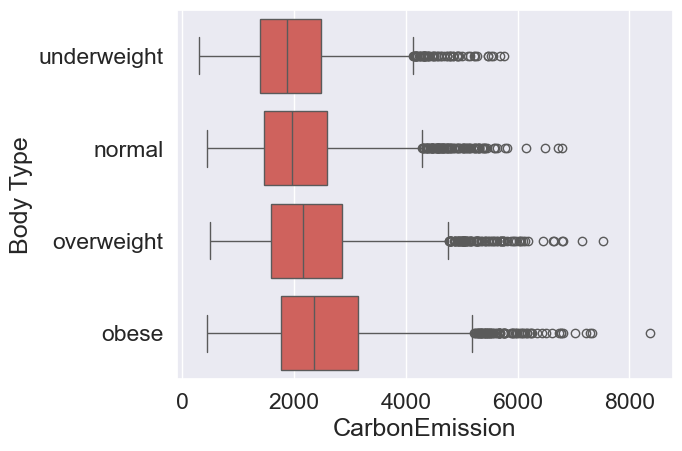

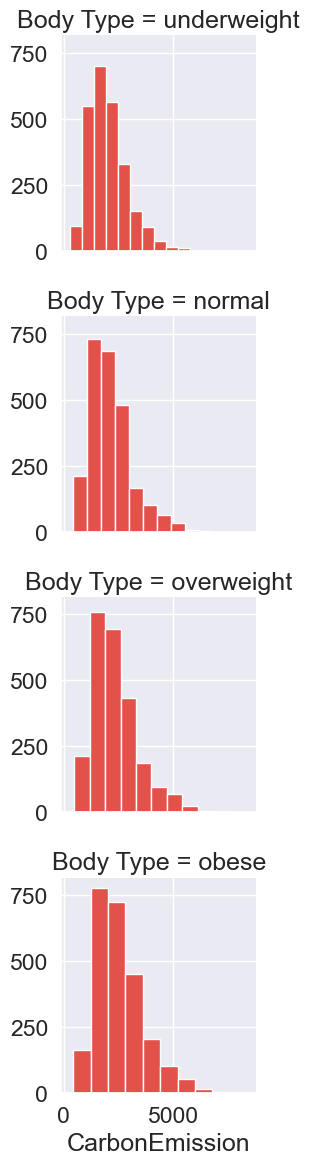

In [ ]:
#Box-Plot and Histogramm

sns.boxplot(x = df["CarbonEmission"], y = df["Body Type"])
#histogram grouped by time. x-Achse: Zeigt die Werte der "CarbonEmission"-Spalte. y-Achse: Zeigt die Anzahl der "CarbonEmission"-Werte, die in jedem Intervall (Bin) des Histogramms liegen.
g = sns.FacetGrid(df, row = "Body Type") #Dies erstellt ein FacetGrid-Objekt, das den DataFrame 'df' in verschiedene Zeilen (Facetten) unterteilt, basierend auf den Werten in der Spalte 'BodyType'
g = g.map(plt.hist, "CarbonEmission") #Dies wendet die Funktion 'plt.hist' (Histogramm) auf die Spalte 'CarbonEmission' für jede Facette (jede Zeitkategorie) an.
plt.show()


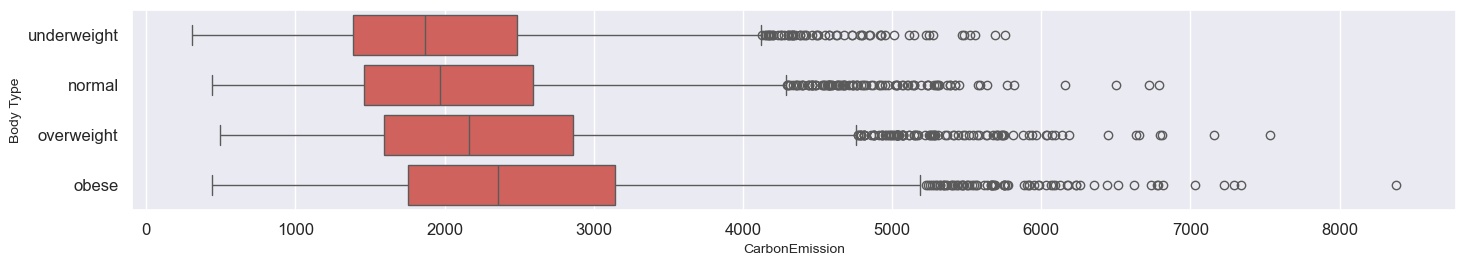

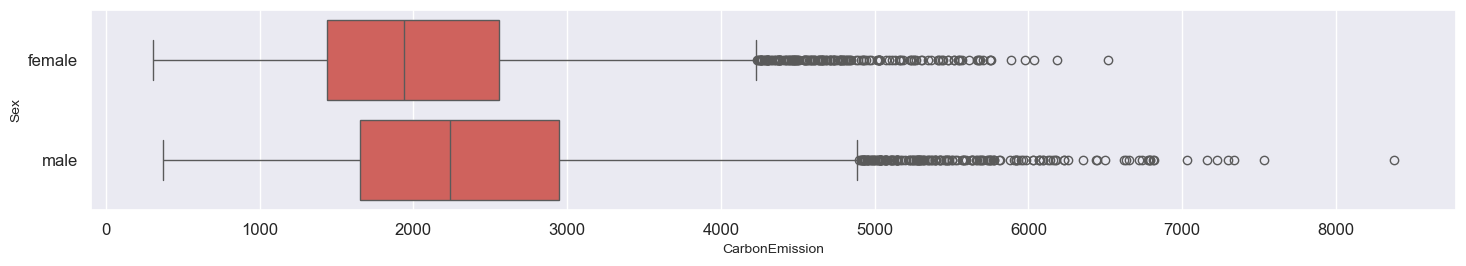

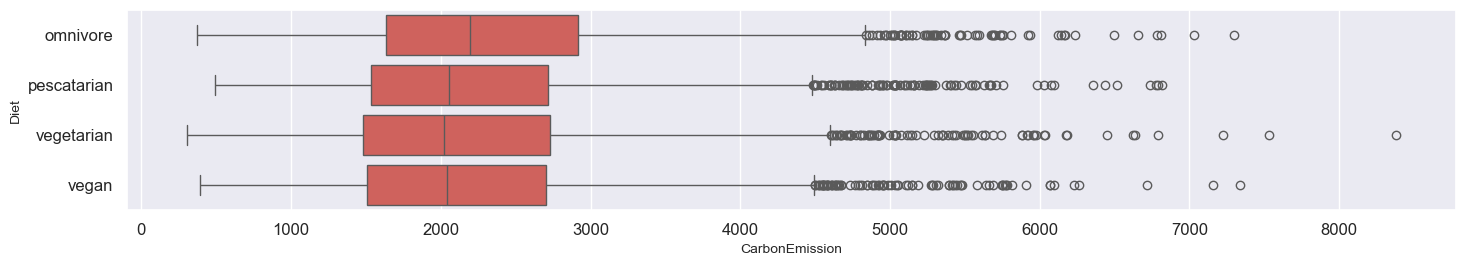

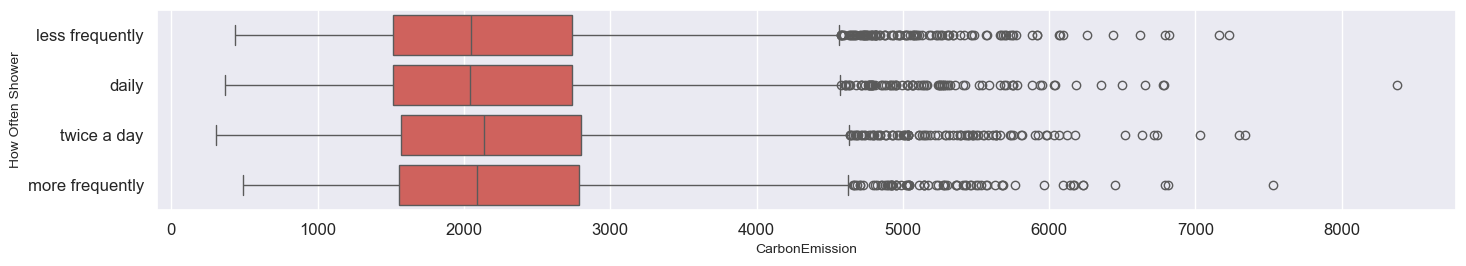

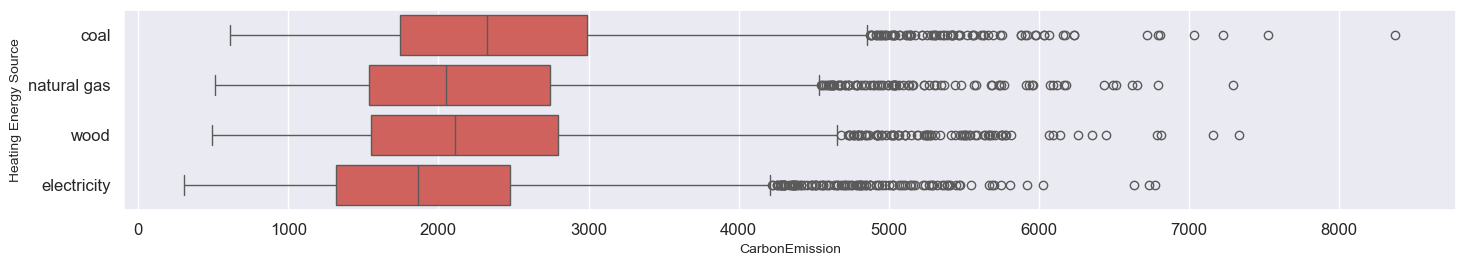

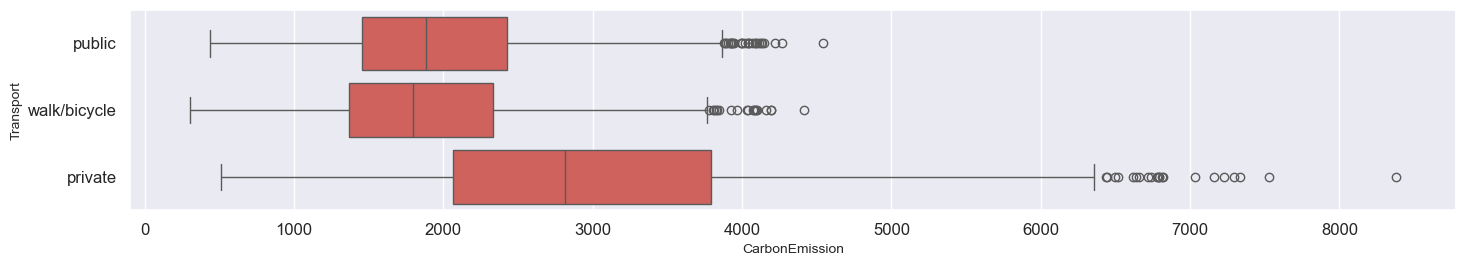

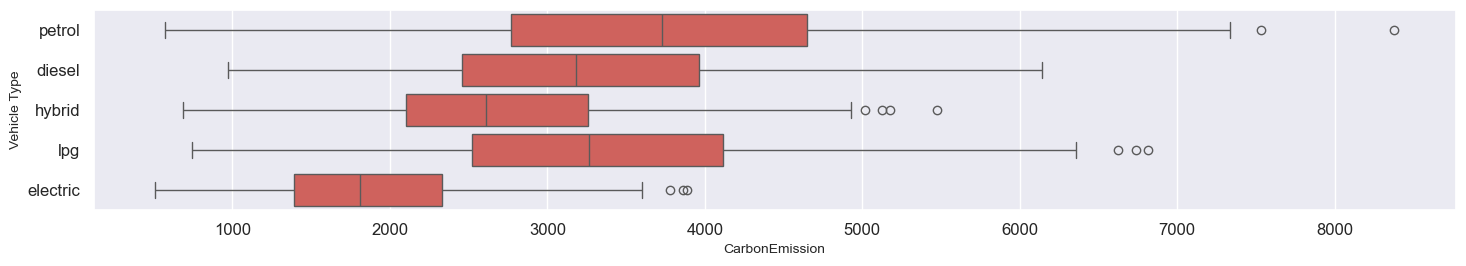

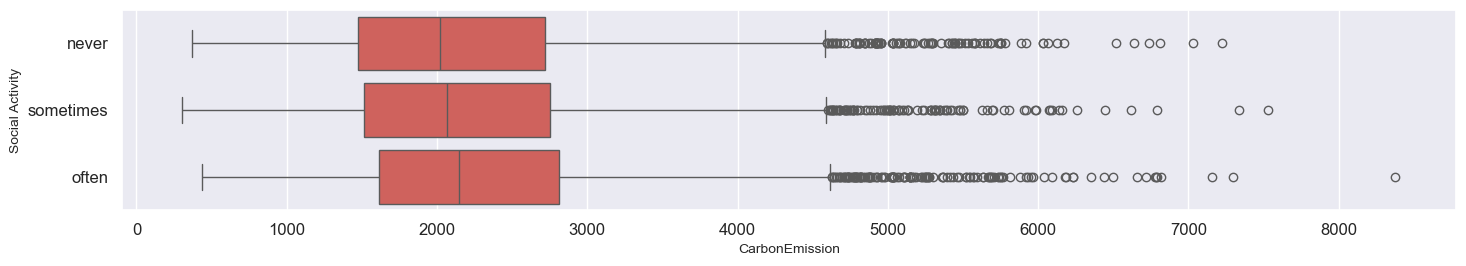

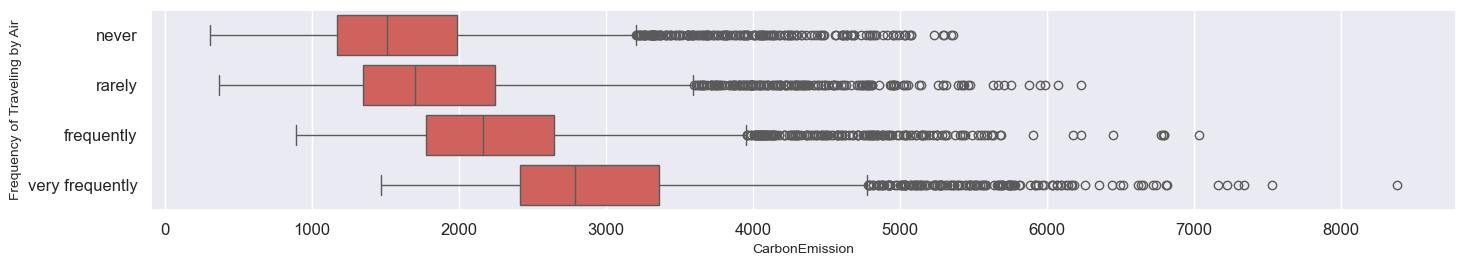

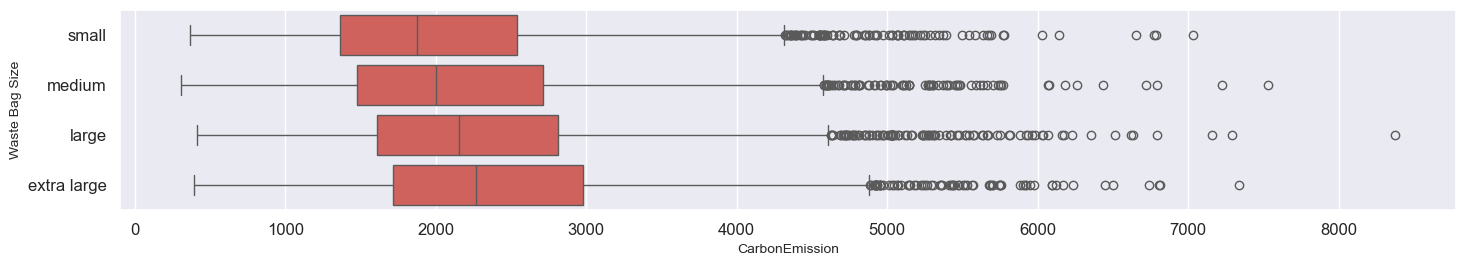

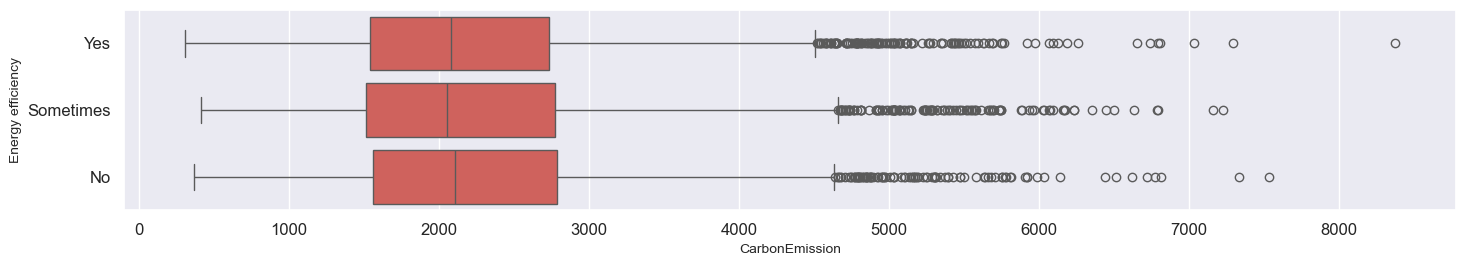

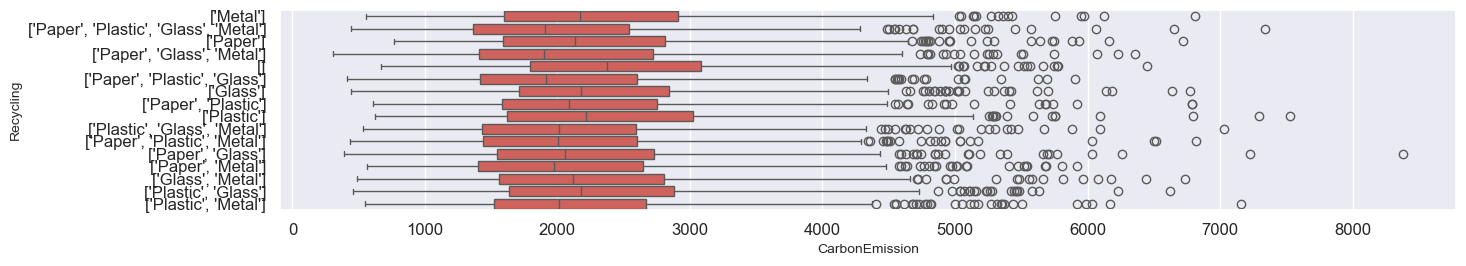

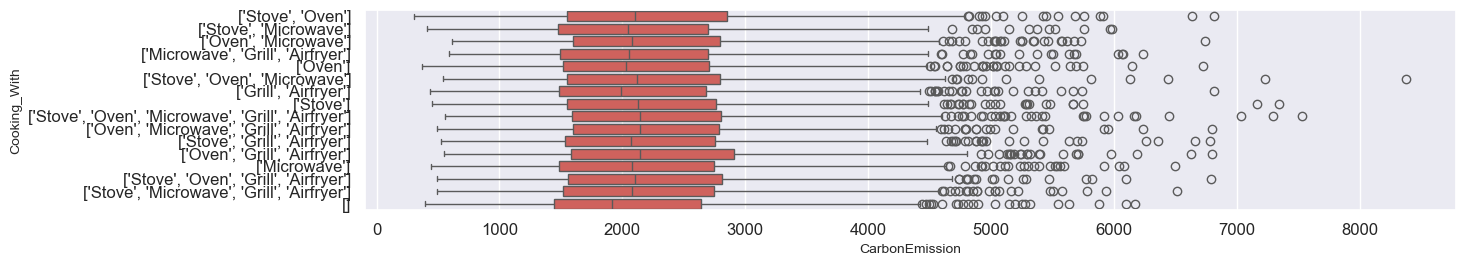

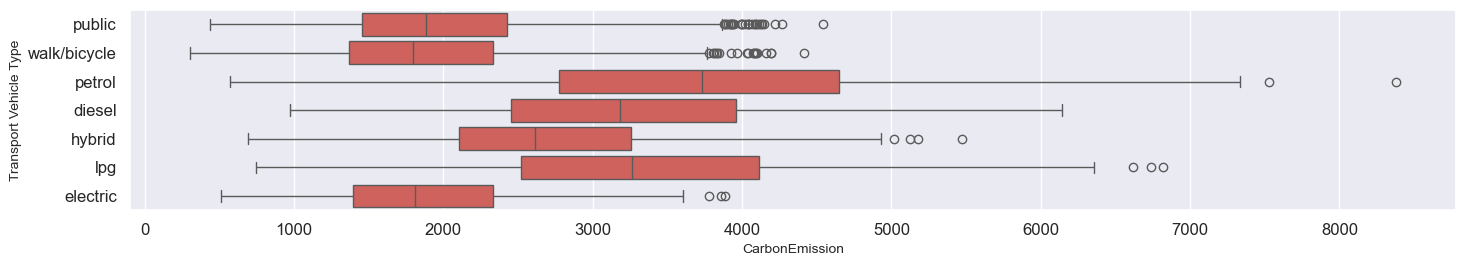

In [ ]:


# Boxplot for categorical variables
string_columns = df.select_dtypes(include=['object','category']).columns.tolist()
for variable in string_columns:
    plt.figure(figsize=(15, 3))  # Ändert die Größe der Grafik 
    sns.boxplot(x = df["CarbonEmission"], y = df[variable])

    plt.xlabel('CarbonEmission', fontsize=10)  # X-Achsenbeschriftung
    plt.ylabel(variable, fontsize=10)  # Y-Achsenbeschriftung
    plt.xticks(fontsize=12)  # Schriftgröße der X-Achse anpassen
    plt.yticks(fontsize=12)  # Schriftgröße der Y-Achse anpassen

    plt.tight_layout()  # sorgt für ordentliche Darstellung ohne Überlappung
    plt.show()



##### linear relation between quantitative variables and Carbon-Emission

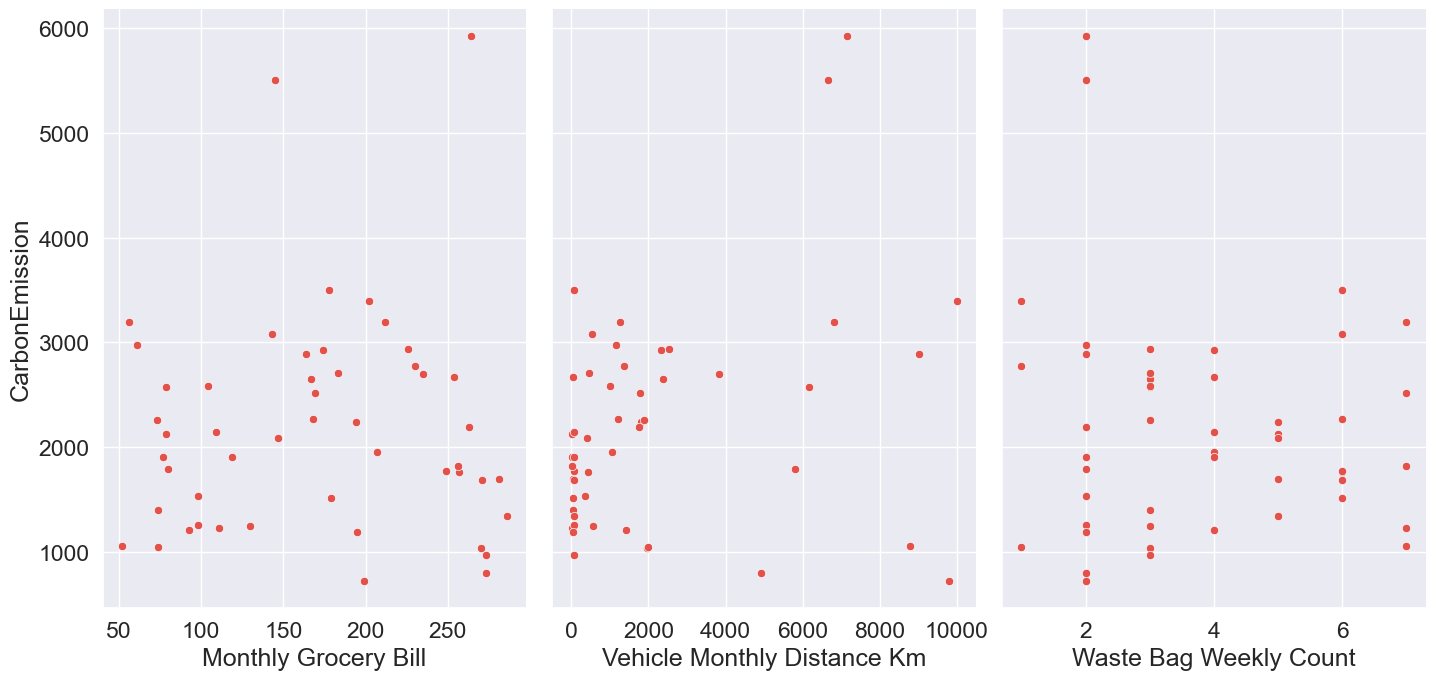

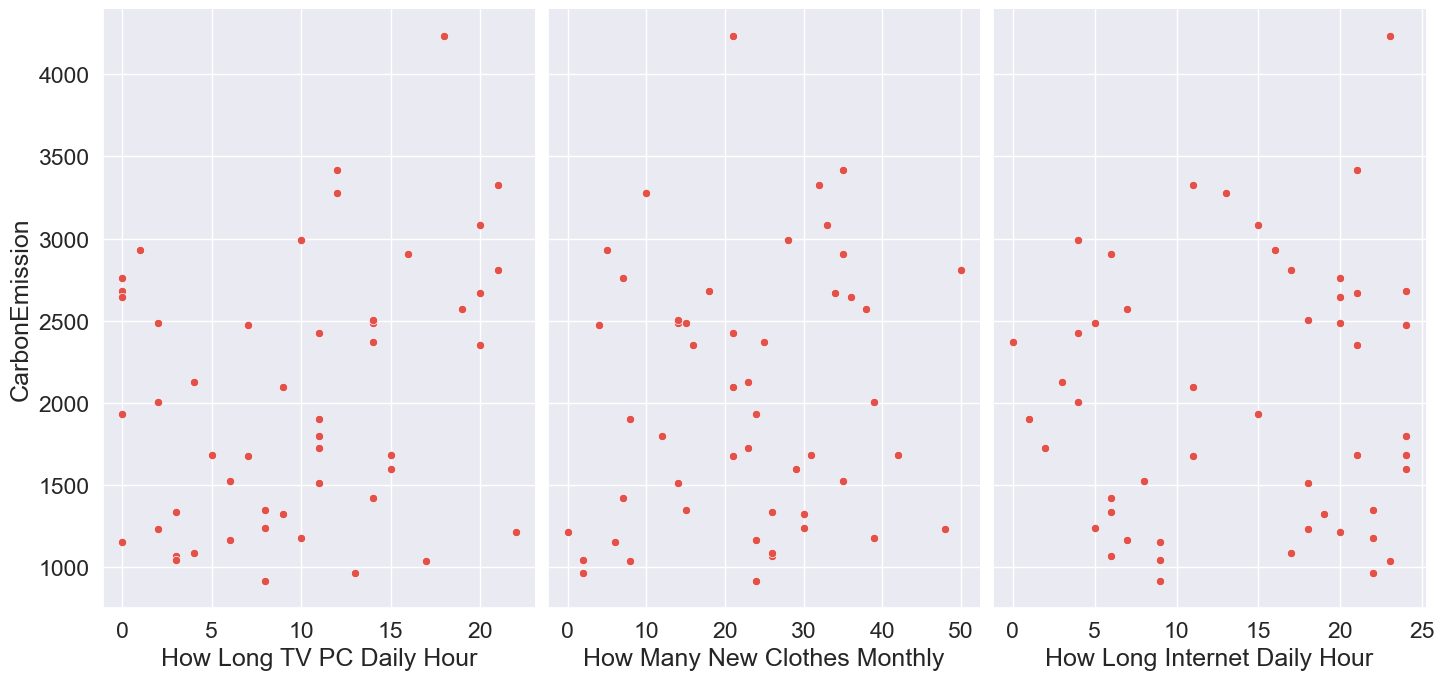

In [ ]:
#plots of quantitative variables

string_columns=["Monthly Grocery Bill", "Vehicle Monthly Distance Km", "Waste Bag Weekly Count"]
string_columns2=["How Long TV PC Daily Hour","How Many New Clothes Monthly", "How Long Internet Daily Hour"]

p = sns.pairplot(df.sample(50), x_vars=string_columns, y_vars="CarbonEmission", size=7, aspect=0.7)
p = sns.pairplot(df.sample(50), x_vars=string_columns2, y_vars="CarbonEmission", size=7, aspect=0.7)
#size=7: Jeder Plot wird eine Höhe von 7 Zoll haben. Allerdings wurde der Parameter size in neueren Versionen von Seaborn durch height ersetzt.
#aspect=0.8:  aspect=Seitenverhältnis. dh Breite =Höhe*Seitenverhältnis


temporarly_used_list=[
    "Monthly Grocery Bill", "Vehicle Monthly Distance Km", 
    "Waste Bag Weekly Count", "How Long TV PC Daily Hour",
    "How Many New Clothes Monthly", "How Long Internet Daily Hour"
    ]
temporarly_used_list.append("CarbonEmission") 
#p = sns.pairplot(df.sample(100))
#p = sns.pairplot(df[temporarly_used_list].sample(100))


##### Evaluating the linear-Regression-Model

In [ ]:
#evaluate the linear Regression

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

y_pred = model.predict(X_train)
print("R squared:", r2_score(y_true=y_train,y_pred=y_pred))

R squared: 0.9342604425095218


In [ ]:
#Prediction of test set
y_pred_mlr= model.predict(X_test)
#Predicted values
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
5883,2790,3187.78
788,2278,2190.85
1934,2828,3019.36
4687,981,867.96
4620,1399,1441.69


In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 176.3400350913319
Mean Square Error: 70874.60064334027
Root Mean Square Error: 266.2228401984703


### 2. Mean of Residuals ✅

In [ ]:
y_pred = model.predict(X_train)
residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals (for train-data)", mean_residuals)


y_pred = model.predict(X_test)
residuals = y_test.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals (for test-data)", mean_residuals)

Mean of Residuals (for train-data) 2.1888505822668473e-13
Mean of Residuals (for test-data) -3.4635320000958134


### 3. Check for Homoscedasticity - ❌ error in Python-coding

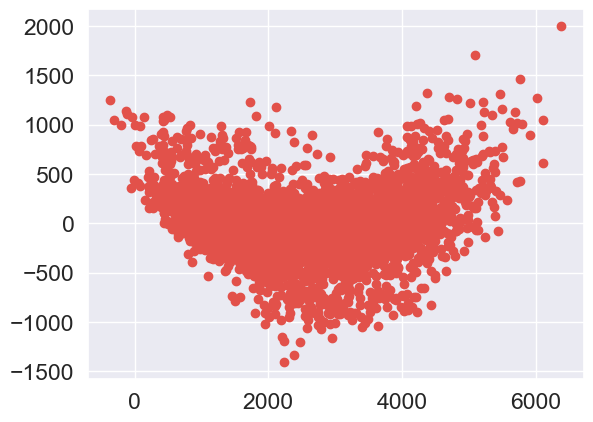

In [ ]:
# Residual
y_pred = model.predict(X_train)
residuals = y_train.values-y_pred

plt.scatter(x=y_pred,y=residuals)


In [ ]:
#Goldfeld Quandt Test¶


import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.0300699369296649), ('p-value', 0.1835721189960212)]

!!! i made a mistake here (i don't know where) - but the Plot of the Bartlett's test is not working!

In [ ]:
#Bartlett’s test



from scipy.stats import bartlett
test = bartlett(X_train.flatten(),residuals)
print(test)

BartlettResult(statistic=4529.948832606618, pvalue=0.0)


### 4.Assumption: Check for Normality of error terms/residuals ✅


##### KDE-Plot

A kernel density estimate (KDE) plot is a method for visualizing the distribution of observations in a dataset, analogous to a histogram. KDE represents the data using a continuous probability density curve in one or more dimensions.
German: Die Kerndichteschätzung (auch Parzen-Fenster-Methode;[1] englisch kernel density estimation, KDE) ist ein statistisches Verfahren zur Schätzung der Wahrscheinlichkeitsverteilung einer Zufallsvariablen.

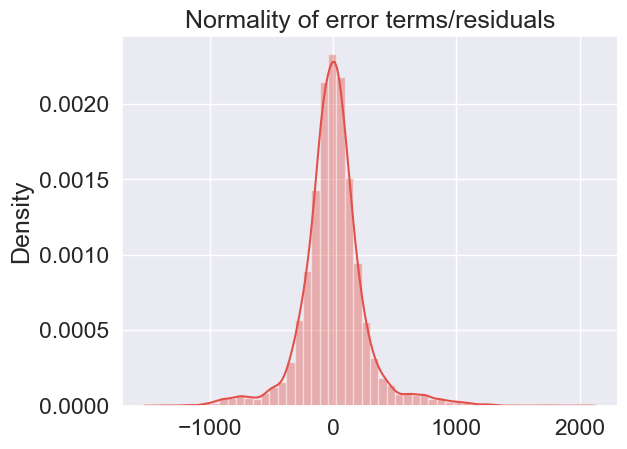

In [ ]:
y_pred = model.predict(X_train)  #X_train muss nicht mehr mit cf.transform umgewandelt werden - das wurde es schon

residuals = y_train.values-y_pred    #difference of actual_price - price_linRegression on the train-set

p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

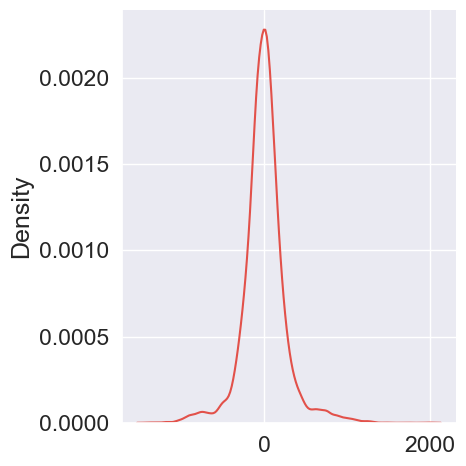

In [ ]:
sns.displot(residuals, kind='kde')

##### QQ-Plot

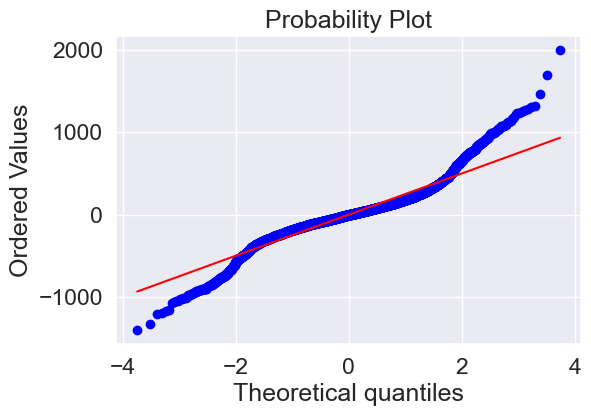

In [ ]:
# QQ Plot
import scipy as sp
fig, ax = plt.subplots (figsize=(6,4))
sp.stats.probplot(residuals, plot=ax, fit=True)
plt.show()

### 5.Assumption: No autocorrelation of residuals   - ❌ I could NOT plot this and I don't understand this

<Axes: >

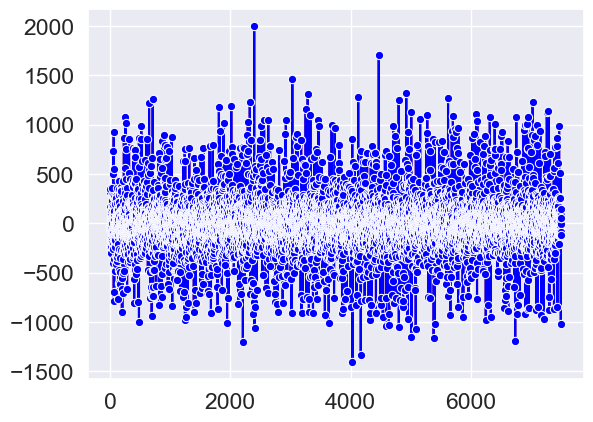

In [ ]:
plt.plot(residuals)
sns.lineplot(residuals,marker='o',color='blue')

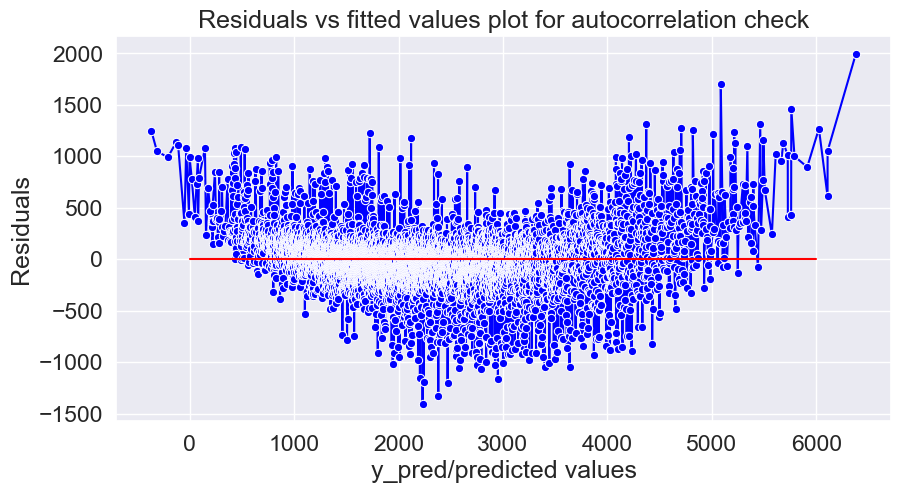

In [ ]:
plt.figure(figsize=(10,5))
p = sns.lineplot(x=y_pred,y=residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
#plt.xlim(0,26)
p = sns.lineplot(x=[0,6000],y=[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

In [ ]:
#Ljungbox test

from statsmodels.stats import diagnostic as diag
#min(diag.acorr_ljungbox(residuals , lags = 40)[1])
min(diag.acorr_ljungbox(residuals , lags = 40).lb_pvalue)

0.051006457496073195

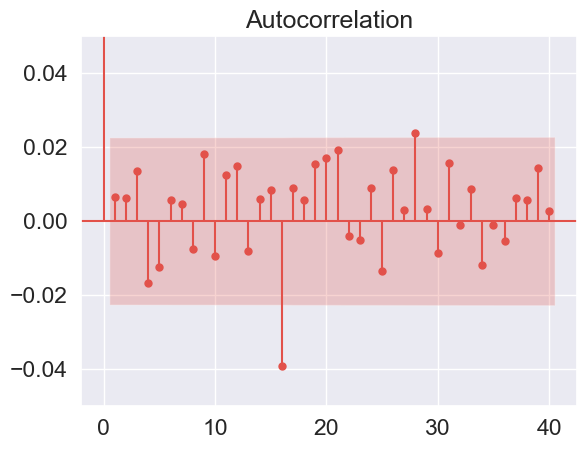

In [ ]:
import statsmodels.api as sm

sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.ylim(-0.050, 0.05) # change the y-axis
plt.show()

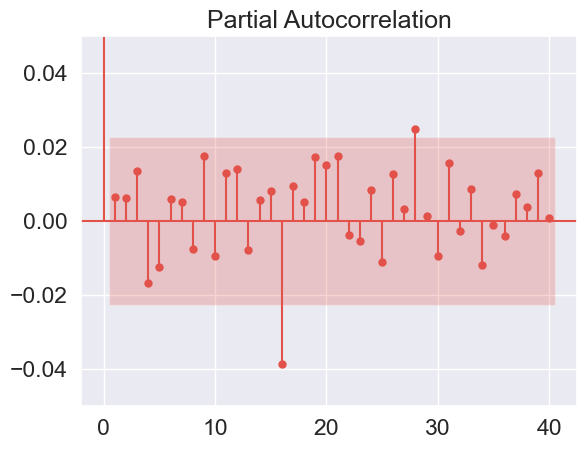

In [ ]:
# partial autocorrelation
sm.graphics.tsa.plot_pacf(residuals, lags=40)
plt.ylim(-0.050, 0.05) # change the y-axis
plt.show()

### 6.Assumption: No perfect multicollinearity ✅


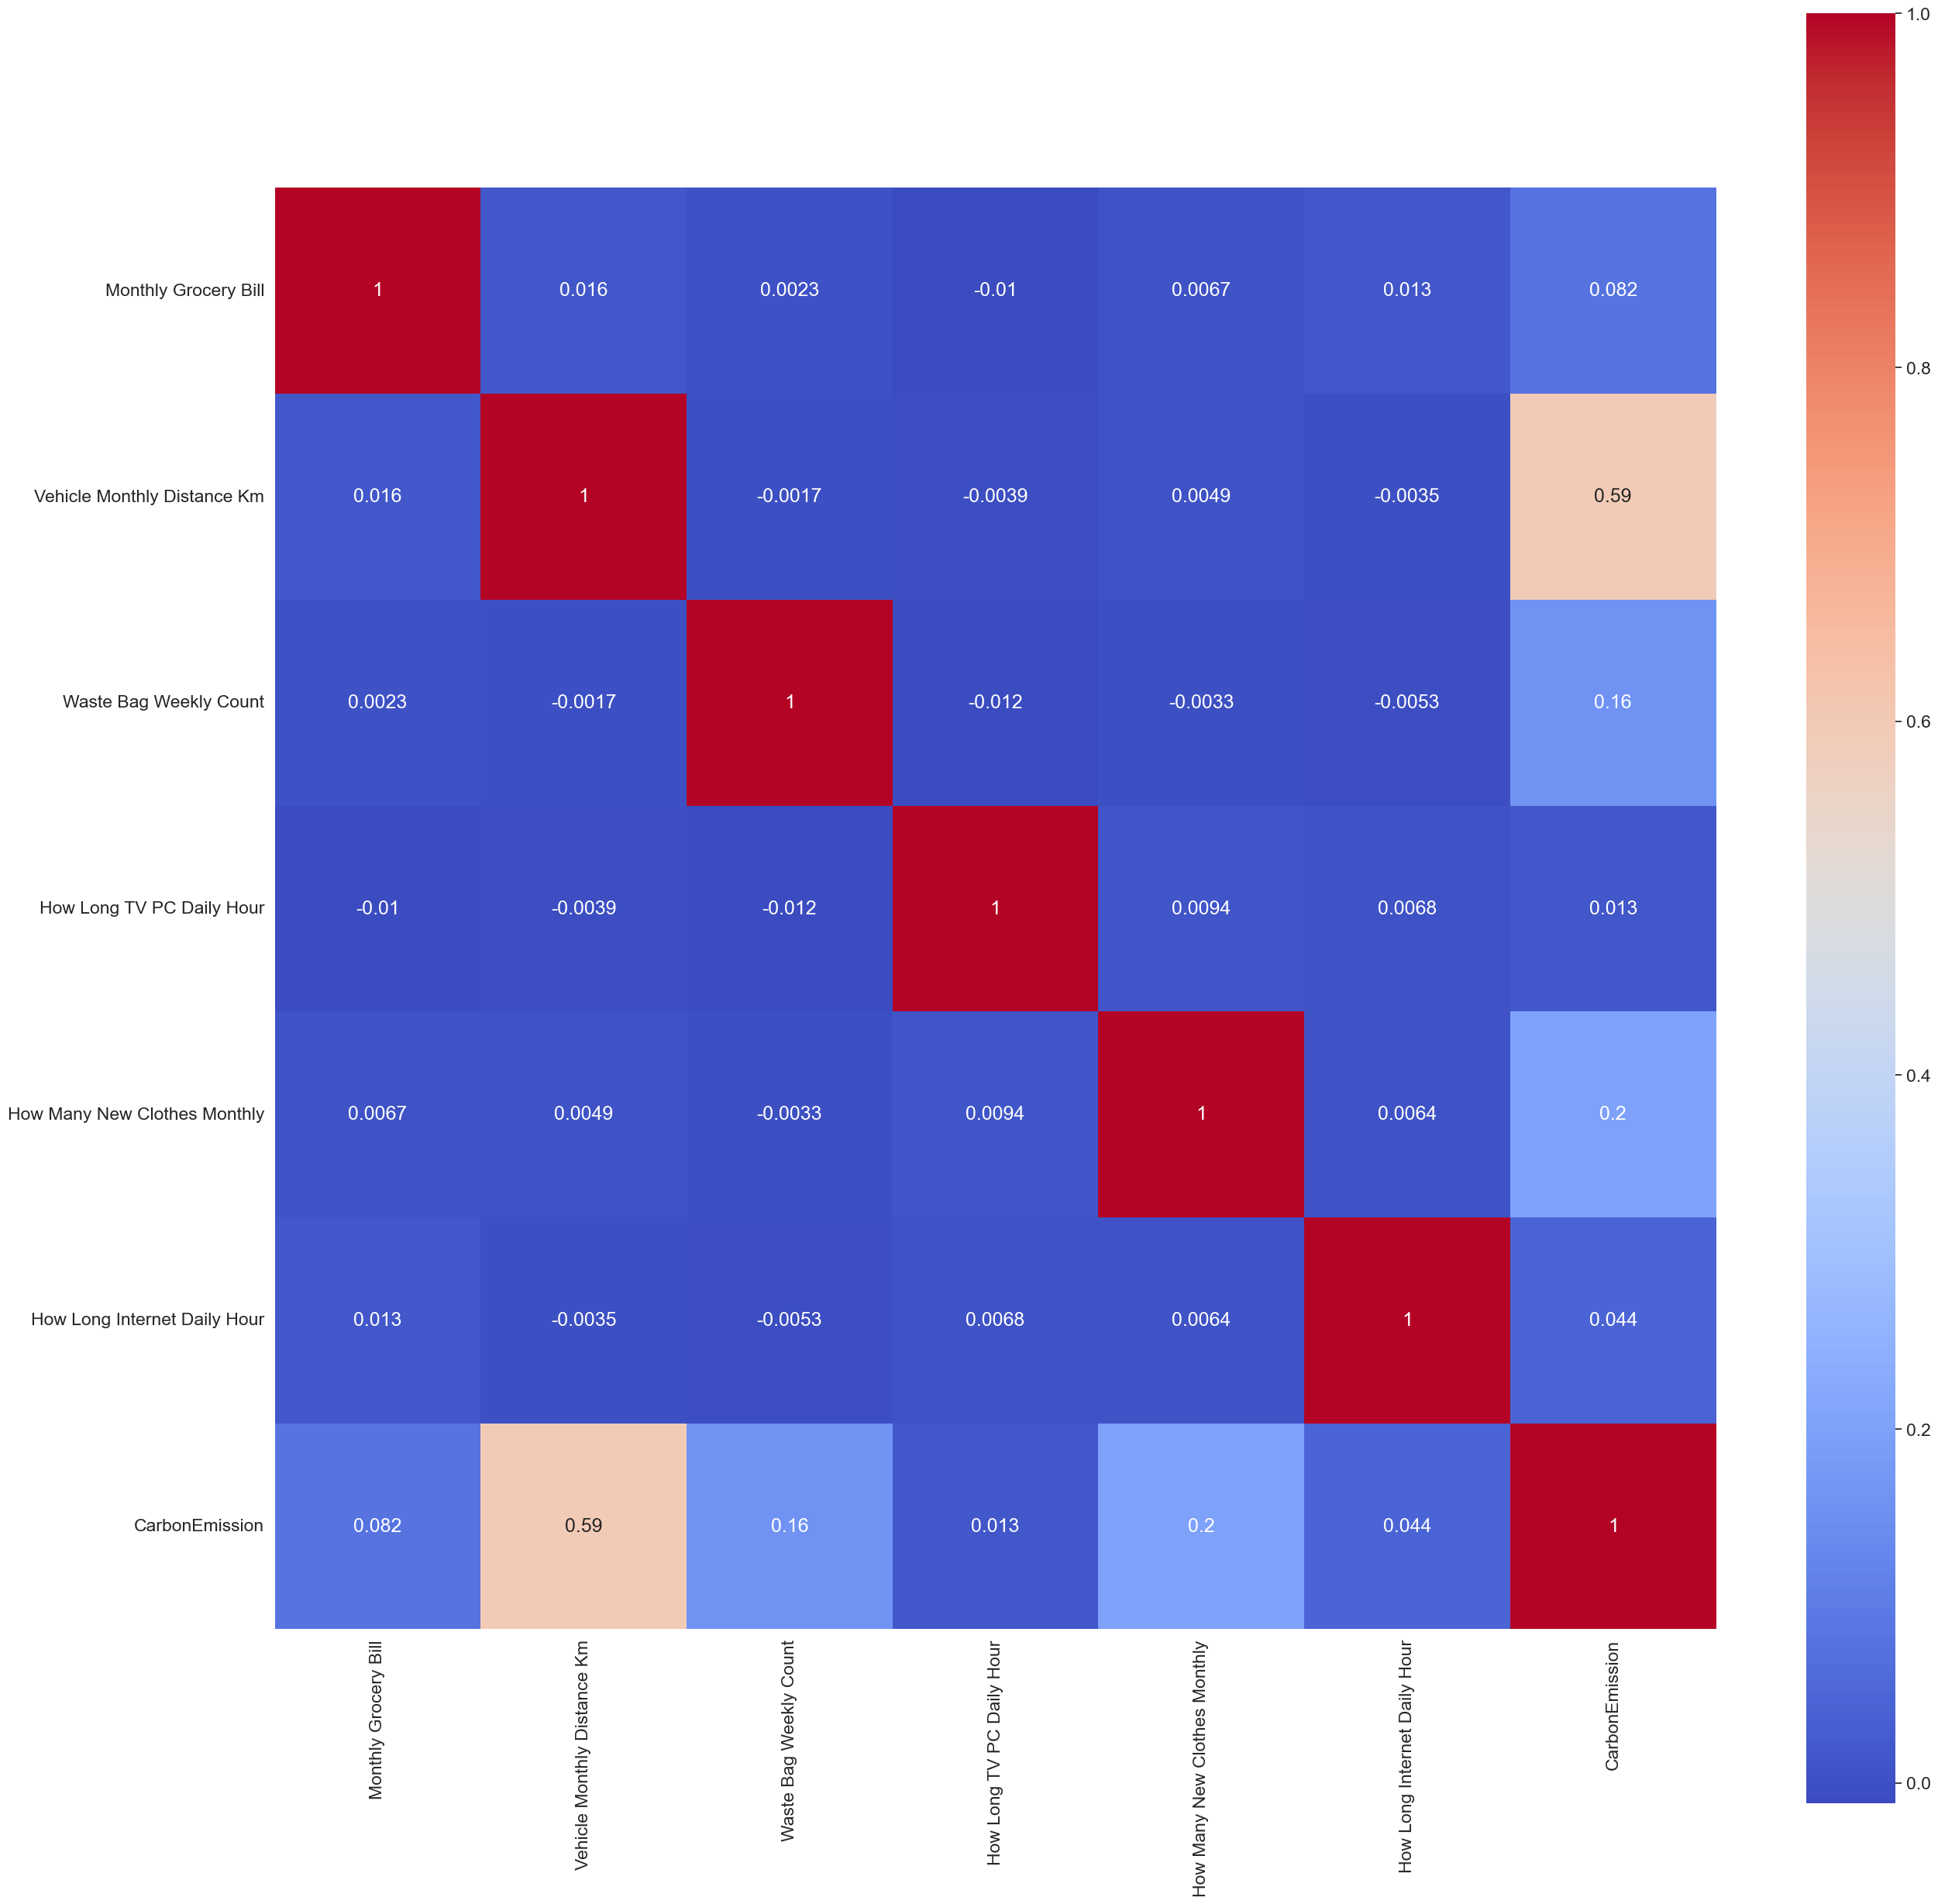

In [ ]:
#this is what i need to change to get no error. The error occurs because the df.corr() method in pandas calculates the correlation matrix, which requires numerical data. However, your DataFrame df contains categorical columns such as 'cut', 'color', and 'clarity', which cannot be converted to floats.
numerical_df = df.iloc[:,:21].select_dtypes(include=[np.number]) 



plt.figure(figsize=(30,30))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(numerical_df.corr(), annot=True,cmap='coolwarm',square=True)  # seaborn has very simple solution for heatmap

In [ ]:
#i made this myself
numerical_df.corr()['CarbonEmission'].sort_values(ascending=False)

CarbonEmission                 1.00
Vehicle Monthly Distance Km    0.59
How Many New Clothes Monthly   0.20
Waste Bag Weekly Count         0.16
Monthly Grocery Bill           0.08
How Long Internet Daily Hour   0.04
How Long TV PC Daily Hour      0.01
Name: CarbonEmission, dtype: float64

### 7. Some other model evaluations (optional) ✅

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

#elisabeth@AirvonElisabeth ~ % mamba activate elisabeth_python-umgebung_nr1
#control + R: Befehle aus der Vergangenheit suchen
#mamba install lazypredict - hat nicht funktioniert
#pip install lazypredict -deshalb das gemacht

########################################
#one-hot-encoding:   #changed:     [(col, OneHotEncoder(drop="first", sparse_output=False), [col]) for col in variables_for_one_hot_encoded],  
cf = ColumnTransformer(
    [(col, OneHotEncoder(drop="first", sparse_output=False), [col]) for col in variables_for_one_hot_encoded],  
    remainder="passthrough")   


cf.fit(X)
X_transformed = cf.transform(X)
########################################

y = df["CarbonEmission"]

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_transformed,y,test_size=.5,random_state =123)

clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train2, X_test2, y_train2, y_test2)

print(models)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'